# 3 Pointers Made against shooting.csv

### Import packages

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from scipy.stats import pearsonr
import itertools

pd.set_option("display.max_columns", None)

### Set working directory

In [2]:
# Print working directory
cwd = os.getcwd()
print(f'Directory: {cwd}')

# Change working directory
os.chdir('/Users/tyler/OneDrive/Documents/Python/NBA')

# Print working directory
cwd = os.getcwd()
print(f'Directory: {cwd}')

Directory: C:\Users\tyler\OneDrive\Documents\Python\NBA\backend\analysis
Directory: C:\Users\tyler\OneDrive\Documents\Python\NBA


## Exploratory Data Analysis

### Import data

In [3]:
df = pd.read_csv('backend/data/shooting.csv').drop(['Unnamed: 0'], axis=1)

### Basic exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194138 entries, 0 to 194137
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      194138 non-null  object 
 1   visitor   194138 non-null  object 
 2   home      194138 non-null  object 
 3   team      194138 non-null  int64  
 4   quarter   194138 non-null  object 
 5   fg        194138 non-null  int64  
 6   fga       194138 non-null  int64  
 7   fg_perc   194138 non-null  float64
 8   2p        194138 non-null  int64  
 9   2pa       194138 non-null  int64  
 10  2p_perc   194135 non-null  float64
 11  3p        194138 non-null  int64  
 12  3pa       194138 non-null  int64  
 13  3p_perc   192676 non-null  float64
 14  efg_perc  194138 non-null  float64
 15  ast       194138 non-null  int64  
 16  ast_perc  194116 non-null  float64
dtypes: float64(5), int64(8), object(4)
memory usage: 25.2+ MB


In [5]:
df.sample(5)

,date,visitor,home,team,quarter,fg,fga,fg_perc,2p,2pa,2p_perc,3p,3pa,3p_perc,efg_perc,ast,ast_perc
141525,"Tue, Mar 21, 2017",Detroit Pistons,Brooklyn Nets,0,q2,5,22,0.227,4,14,0.286,1,8,0.125,0.250,3,0.600
95683,"Thu, Jan 2, 2014",Charlotte Bobcats,Portland Trail Blazers,0,q2,9,21,0.429,9,20,0.450,0,1,0.000,0.429,2,0.222
48775,"Fri, Feb 26, 2010",Philadelphia 76ers,Los Angeles Lakers,1,q3,11,25,0.440,10,22,0.455,1,3,0.333,0.460,4,0.364
123604,"Fri, Jan 15, 2016",Charlotte Hornets,New Orleans Pelicans,1,q4,11,21,0.524,10,18,0.556,1,3,0.333,0.548,7,0.636
41268,"Fri, Nov 13, 2009",Houston Rockets,Sacramento Kings,0,q1,11,22,0.500,8,15,0.533,3,7,0.429,0.568,4,0.364


In [6]:
# Convert 'date' column to Date object
df['date'] = pd.to_datetime(df['date'])

# Conver 'team' column to Team Name
df['team'] = np.where(df['team'], df['home'], df['visitor'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194138 entries, 0 to 194137
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      194138 non-null  datetime64[ns]
 1   visitor   194138 non-null  object        
 2   home      194138 non-null  object        
 3   team      194138 non-null  object        
 4   quarter   194138 non-null  object        
 5   fg        194138 non-null  int64         
 6   fga       194138 non-null  int64         
 7   fg_perc   194138 non-null  float64       
 8   2p        194138 non-null  int64         
 9   2pa       194138 non-null  int64         
 10  2p_perc   194135 non-null  float64       
 11  3p        194138 non-null  int64         
 12  3pa       194138 non-null  int64         
 13  3p_perc   192676 non-null  float64       
 14  efg_perc  194138 non-null  float64       
 15  ast       194138 non-null  int64         
 16  ast_perc  194116 non-null  float64    

In [7]:
total_df = df[df['quarter'] == 'total']
q1_df = df[df['quarter'] == 'q1']
q2_df = df[df['quarter'] == 'q2']
q3_df = df[df['quarter'] == 'q3']
q4_df = df[df['quarter'] == 'q4']

In [8]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38288 entries, 4 to 194137
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      38288 non-null  datetime64[ns]
 1   visitor   38288 non-null  object        
 2   home      38288 non-null  object        
 3   team      38288 non-null  object        
 4   quarter   38288 non-null  object        
 5   fg        38288 non-null  int64         
 6   fga       38288 non-null  int64         
 7   fg_perc   38288 non-null  float64       
 8   2p        38288 non-null  int64         
 9   2pa       38288 non-null  int64         
 10  2p_perc   38288 non-null  float64       
 11  3p        38288 non-null  int64         
 12  3pa       38288 non-null  int64         
 13  3p_perc   38288 non-null  float64       
 14  efg_perc  38288 non-null  float64       
 15  ast       38288 non-null  int64         
 16  ast_perc  38288 non-null  float64       
dtypes: datetime

### 3 Pointer's Made vs Year (--)

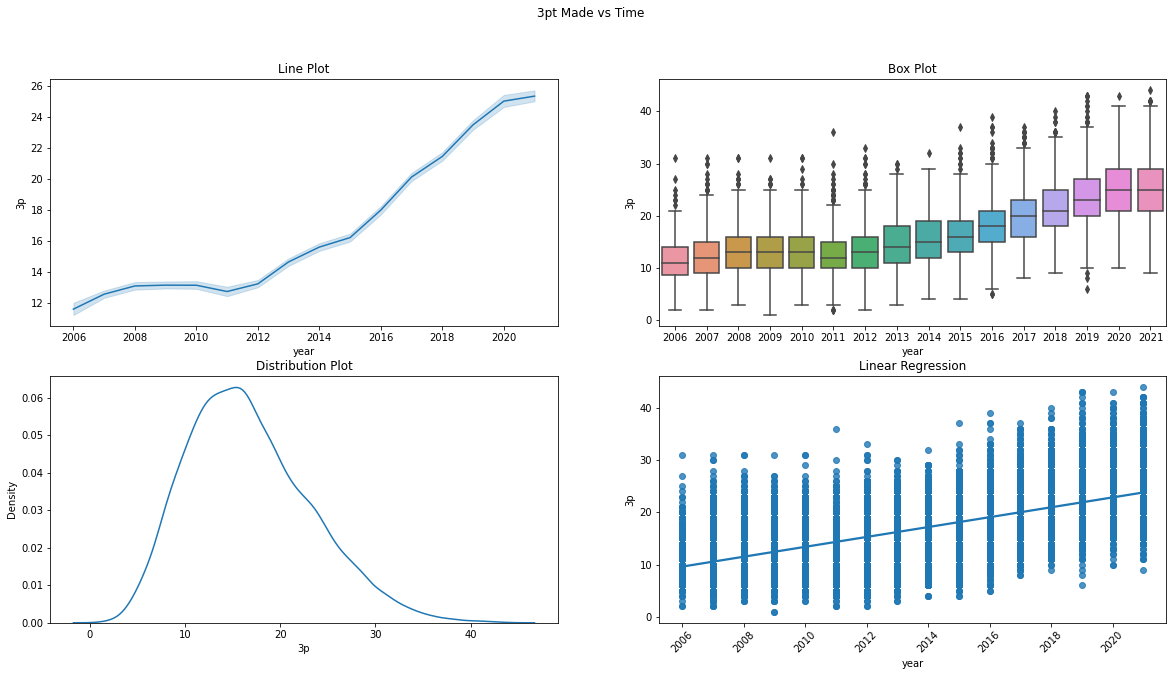

In [9]:
# Groupby and sum all statistics
totals = total_df.groupby(['date', 'visitor', 'home']).sum().reset_index()

# Create year and month columns
totals['year'] = totals['date'].dt.year
totals['month'] = totals['date'].dt.month

# Change plot size
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('3pt Made vs Time')
fig = plt.gcf()

# Plot lineplot of Total 3pt Made over Time
chart = sns.lineplot(x='year', y='3p', data=totals, ax= ax[0, 0]).set(title='Line Plot')

# Plot boxplot of Total 3pt Made over Time
chart = sns.boxplot(x='year', y='3p', data=totals, ax=ax[0, 1]).set(title= 'Box Plot')
plt.xticks(rotation=45)

# Plot distribution plot of Total 3pt Made over Time
chart = sns.kdeplot(x='3p', data=totals, ax=ax[1,0]).set(title='Distribution Plot')

# Plot linearregression of Total 3pt Made over Time
chart = sns.regplot(x='year', y='3p', data=totals, ax=ax[1, 1]).set(title='Linear Regression')

plt.show()

### 3 Pointer's Made vs Year (2015 - current)

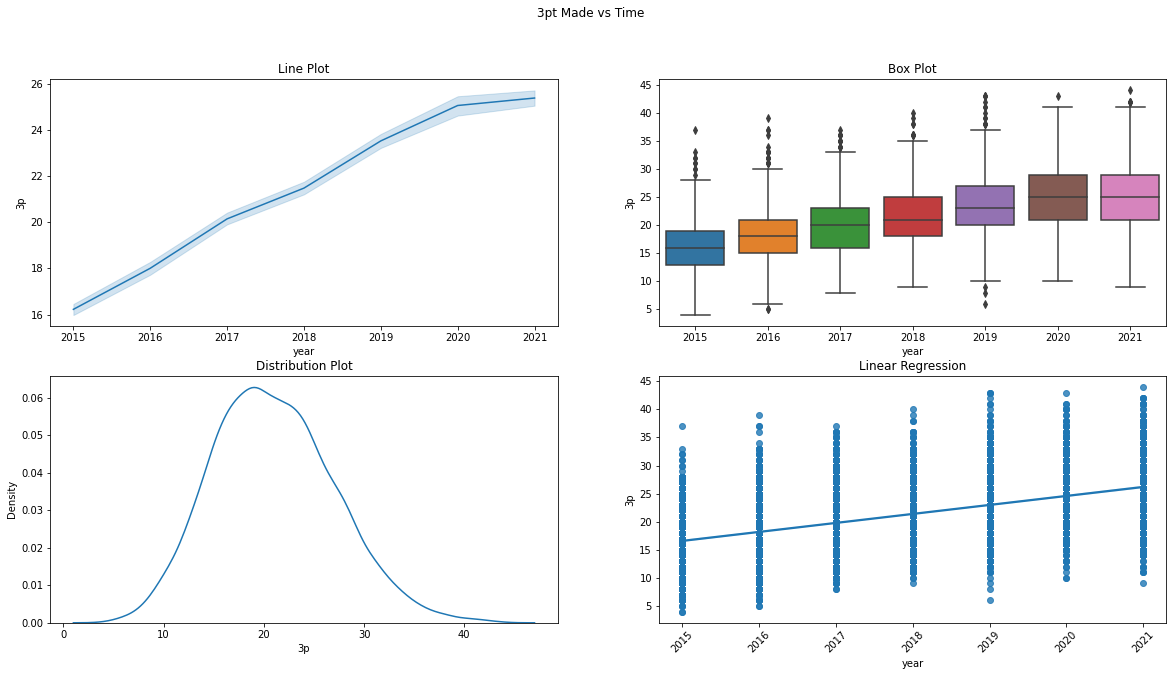

In [10]:
# Change plot size
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('3pt Made vs Time')
fig = plt.gcf()

year = 2015

# Plot lineplot of Total 3pt Made over Time
chart = sns.lineplot(x='year', y='3p', data=totals[totals['year'] >= year], ax= ax[0, 0]).set(title='Line Plot')

# Plot boxplot of Total 3pt Made over Time
chart = sns.boxplot(x='year', y='3p', data=totals[totals['year'] >= year], ax=ax[0, 1]).set(title= 'Box Plot')
plt.xticks(rotation=45)

# Plot distribution plot of Total 3pt Made over Time
chart = sns.kdeplot(x='3p', data=totals[totals['year'] >= year], ax=ax[1,0]).set(title='Distribution Plot')

# Plot linearregression of Total 3pt Made over Time
chart = sns.regplot(x='year', y='3p', data=totals[totals['year'] >= year], ax=ax[1, 1]).set(title='Linear Regression')

plt.xticks(rotation=45)
plt.show()

### 3 Pointer's Made vs FGA (2015 - current)

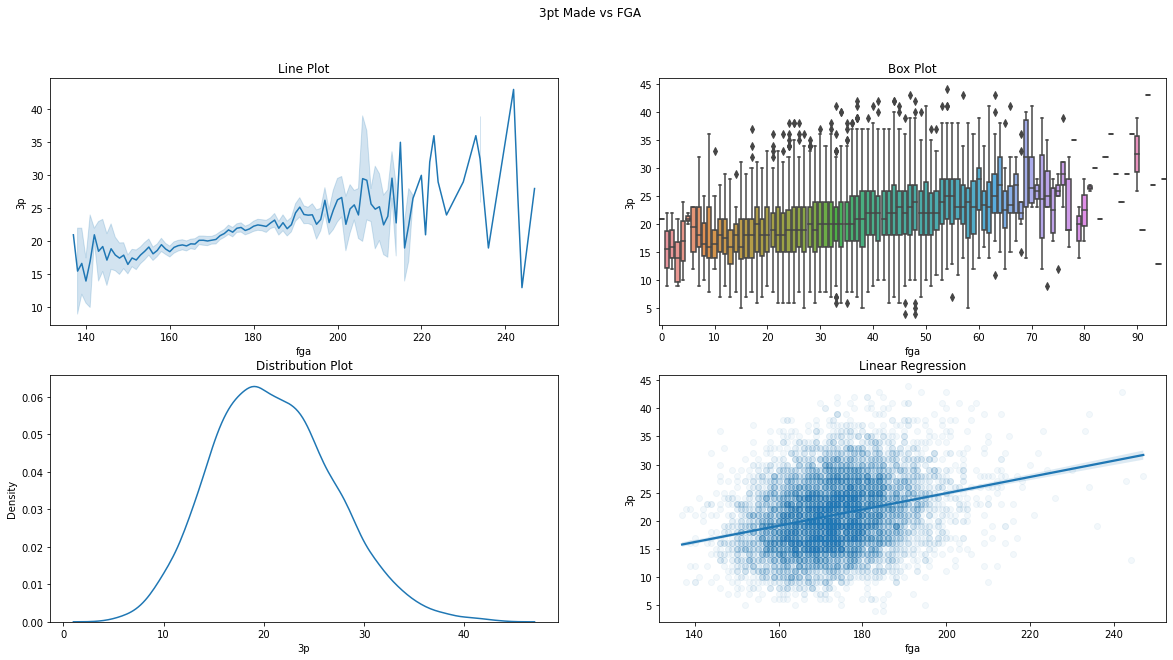

In [11]:
# Change plot size
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('3pt Made vs FGA')
fig = plt.gcf()

year = 2015

# Plot lineplot of Total 3pt Made over FGA
chart = sns.lineplot(x='fga', y='3p', data=totals[totals['year'] >= year], ax= ax[0, 0]).set(title='Line Plot')

# Plot boxplot of Total 3pt Made over FGA
chart = sns.boxplot(x='fga', y='3p', data=totals[totals['year'] >= year], ax=ax[0, 1]).set(title= 'Box Plot')
ax[0, 1].xaxis.set_major_locator(ticker.MultipleLocator(10))
ax[0, 1].xaxis.set_major_formatter(ticker.ScalarFormatter())

# Plot distribution plot of Total 3pt Made over FGA
chart = sns.kdeplot(x='3p', data=totals[totals['year'] >= year], ax=ax[1,0]).set(title='Distribution Plot')

# Plot linearregression of Total 3pt Made over FGA
chart = sns.regplot(x='fga', y='3p', data=totals[totals['year'] >= year], ax=ax[1, 1], scatter_kws={'alpha':0.05}).set(title='Linear Regression')

plt.show()

# Dataframe of team's last 15 performances

In [12]:
# Totals
total_df = df[df['quarter'] == 'total'].copy()

# Return ten lastest dates team played
def last_15_date(team, date):
    schedule = total_df[total_df['team'] == team].sort_values(by='date').reset_index()
    date_index = schedule[schedule['date'] == date].index[0]
    if date_index - 15 < 0:
        return None, None, None, None, None, None, None, None, None, None, None, None, None, None, None
    else:
        date_1, date_2 = schedule.iloc[date_index - 1]['date'], schedule.iloc[date_index - 2]['date']
        date_3, date_4 = schedule.iloc[date_index - 3]['date'], schedule.iloc[date_index - 4]['date']
        date_5, date_6 = schedule.iloc[date_index - 5]['date'], schedule.iloc[date_index - 6]['date']
        date_7, date_8 = schedule.iloc[date_index - 7]['date'], schedule.iloc[date_index - 8]['date']
        date_9, date_10 = schedule.iloc[date_index - 9]['date'], schedule.iloc[date_index - 10]['date']
        date_11, date_12 = schedule.iloc[date_index - 11]['date'], schedule.iloc[date_index - 12]['date']
        date_13, date_14 = schedule.iloc[date_index - 13]['date'], schedule.iloc[date_index - 14]['date']
        date_15 = schedule.iloc[date_index - 15]['date']
        return date_1, date_2, date_3, date_4, date_5, date_6, date_7, date_8, date_9, date_10, date_11, date_12, date_13, date_14, date_15

total_df['dates'] = total_df.apply(lambda x: last_15_date(x.team, x.date), axis=1)
total_df['date_1'], total_df['date_2'] = total_df['dates'].apply(lambda x: x[0]), total_df['dates'].apply(lambda x: x[1])
total_df['date_3'], total_df['date_4'] = total_df['dates'].apply(lambda x: x[2]), total_df['dates'].apply(lambda x: x[3])
total_df['date_5'], total_df['date_6'] = total_df['dates'].apply(lambda x: x[4]), total_df['dates'].apply(lambda x: x[5])
total_df['date_7'], total_df['date_8'] = total_df['dates'].apply(lambda x: x[6]), total_df['dates'].apply(lambda x: x[7])
total_df['date_9'], total_df['date_10'] = total_df['dates'].apply(lambda x: x[8]), total_df['dates'].apply(lambda x: x[9])
total_df['date_11'], total_df['date_12'] = total_df['dates'].apply(lambda x: x[10]), total_df['dates'].apply(lambda x: x[11])
total_df['date_13'], total_df['date_14'] = total_df['dates'].apply(lambda x: x[12]), total_df['dates'].apply(lambda x: x[13])
total_df['date_15'] = total_df['dates'].apply(lambda x: x[14])

In [13]:
# X and y column names to merge on
x_cols = ['date', 'team', 'fg', 'fga', 'fg_perc', '2p', '2pa', '2p_perc',
          '3p', '3pa', '3p_perc', 'efg_perc', 'ast', 'ast_perc']

last_15_games = total_df.copy()
last_15_games.loc[:, 'target'] = last_15_games.loc[:, '3p']
X = total_df[x_cols].copy()

# Dataframe of target (3pt made by each team) and of variables (last 5 games stats for each team)
dates = ['_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10', '_11', '_12', '_13', '_14', '_15']
for date in dates:
    last_15_games = pd.merge(last_15_games, X, left_on=['date' + date, 'team'], right_on=['date', 'team'], how='left', suffixes=('', date))

## Feature Engineering

In [14]:
# Create season variable
def season(month, year):
    if (month in list(range(10, 13)) and year == 2006) or (month in list(range(1, 7)) and year == 2007):
        return 2006
    elif (month in list(range(10, 13)) and year == 2007) or (month in list(range(1, 7)) and year == 2008):
        return 2007
    elif (month in list(range(10, 13)) and year == 2008) or (month in list(range(1, 7)) and year == 2009):
        return 2008
    elif (month in list(range(10, 13)) and year == 2009) or (month in list(range(1, 7)) and year == 2010):
        return 2009
    elif (month in list(range(10, 13)) and year == 2010) or (month in list(range(1, 7)) and year == 2011):
        return 2010
    elif (month in list(range(10, 11)) and year == 2011) or (month in list(range(1, 7)) and year == 2012):
        return 2011
    elif (month in list(range(10, 13)) and year == 2012) or (month in list(range(1, 7)) and year == 2013):
        return 2012
    elif (month in list(range(10, 13)) and year == 2013) or (month in list(range(1, 7)) and year == 2014):
        return 2013
    elif (month in list(range(10, 13)) and year == 2014) or (month in list(range(1, 7)) and year == 2015):
        return 2014
    elif (month in list(range(10, 13)) and year == 2015) or (month in list(range(1, 7)) and year == 2016):
        return 2015
    elif (month in list(range(10, 13)) and year == 2016) or (month in list(range(1, 7)) and year == 2017):
        return 2016
    elif (month in list(range(10, 13)) and year == 2017) or (month in list(range(1, 7)) and year == 2018):
        return 2017
    elif (month in list(range(10, 13)) and year == 2018) or (month in list(range(1, 7)) and year == 2019):
        return 2018
    elif (month in list(range(10, 13)) and year == 2019) or (month in list(range(1, 11)) and year == 2020):
        return 2019
    elif (month in list(range(12, 13)) and year == 2020) or (month in list(range(1, 8)) and year == 2021):
        return 2020

total_df['season'] = total_df['date'].apply(lambda x: season(x.month, x.year))
last_15_games['season'] = last_15_games['date'].apply(lambda x: season(x.month, x.year))
last_15_games.sample()

,date,visitor,home,team,quarter,fg,fga,fg_perc,2p,2pa,2p_perc,3p,3pa,3p_perc,efg_perc,ast,ast_perc,dates,date_1,date_2,date_3,date_4,date_5,date_6,date_7,date_8,date_9,date_10,date_11,date_12,date_13,date_14,date_15,target,date_1,fg_1,fga_1,fg_perc_1,2p_1,2pa_1,2p_perc_1,3p_1,3pa_1,3p_perc_1,efg_perc_1,ast_1,ast_perc_1,date_2,fg_2,fga_2,fg_perc_2,2p_2,2pa_2,2p_perc_2,3p_2,3pa_2,3p_perc_2,efg_perc_2,ast_2,ast_perc_2,date_3,fg_3,fga_3,fg_perc_3,2p_3,2pa_3,2p_perc_3,3p_3,3pa_3,3p_perc_3,efg_perc_3,ast_3,ast_perc_3,date_4,fg_4,fga_4,fg_perc_4,2p_4,2pa_4,2p_perc_4,3p_4,3pa_4,3p_perc_4,efg_perc_4,ast_4,ast_perc_4,date_5,fg_5,fga_5,fg_perc_5,2p_5,2pa_5,2p_perc_5,3p_5,3pa_5,3p_perc_5,efg_perc_5,ast_5,ast_perc_5,date_6,fg_6,fga_6,fg_perc_6,2p_6,2pa_6,2p_perc_6,3p_6,3pa_6,3p_perc_6,efg_perc_6,ast_6,ast_perc_6,date_7,fg_7,fga_7,fg_perc_7,2p_7,2pa_7,2p_perc_7,3p_7,3pa_7,3p_perc_7,efg_perc_7,ast_7,ast_perc_7,date_8,fg_8,fga_8,fg_perc_8,2p_8,2pa_8,2p_perc_8,3p_8,3pa_8,3p_perc_8,efg_perc_8,ast_8,ast_perc_8,date_9,fg_9,fga_9,fg_perc_9,2p_9,2pa_9,2p_perc_9,3p_9,3pa_9,3p_perc_9,efg_perc_9,ast_9,ast_perc_9,date_10,fg_10,fga_10,fg_perc_10,2p_10,2pa_10,2p_perc_10,3p_10,3pa_10,3p_perc_10,efg_perc_10,ast_10,ast_perc_10,date_11,fg_11,fga_11,fg_perc_11,2p_11,2pa_11,2p_perc_11,3p_11,3pa_11,3p_perc_11,efg_perc_11,ast_11,ast_perc_11,date_12,fg_12,fga_12,fg_perc_12,2p_12,2pa_12,2p_perc_12,3p_12,3pa_12,3p_perc_12,efg_perc_12,ast_12,ast_perc_12,date_13,fg_13,fga_13,fg_perc_13,2p_13,2pa_13,2p_perc_13,3p_13,3pa_13,3p_perc_13,efg_perc_13,ast_13,ast_perc_13,date_14,fg_14,fga_14,fg_perc_14,2p_14,2pa_14,2p_perc_14,3p_14,3pa_14,3p_perc_14,efg_perc_14,ast_14,ast_perc_14,date_15,fg_15,fga_15,fg_perc_15,2p_15,2pa_15,2p_perc_15,3p_15,3pa_15,3p_perc_15,efg_perc_15,ast_15,ast_perc_15,season
33360,2019-04-02,Houston Rockets,Sacramento Kings,Houston Rockets,total,46,94,0.489,20,33,0.606,26,61,0.426,0.628,30,0.652,"(2019-03-30 00:00:00, 2019-03-28 00:00:00, 201...",2019-03-30,2019-03-28,2019-03-26,2019-03-24,2019-03-22,2019-03-20,2019-03-19,2019-03-17,2019-03-15,2019-03-13,2019-03-11,2019-03-10,2019-03-08,2019-03-05,2019-03-03,26,2019-03-30,39.0,83.0,0.47,22.0,31.0,0.71,17.0,52.0,0.327,0.572,19.0,0.487,2019-03-28,40.0,87.0,0.46,25.0,47.0,0.532,15.0,40.0,0.375,0.546,22.0,0.55,2019-03-26,36.0,99.0,0.364,20.0,47.0,0.426,16.0,52.0,0.308,0.444,17.0,0.472,2019-03-24,42.0,86.0,0.488,21.0,37.0,0.568,21.0,49.0,0.429,0.61,24.0,0.571,2019-03-22,36.0,86.0,0.419,22.0,49.0,0.449,14.0,37.0,0.378,0.5,12.0,0.333,2019-03-20,42.0,94.0,0.447,21.0,46.0,0.457,21.0,48.0,0.438,0.559,19.0,0.452,2019-03-19,40.0,78.0,0.513,21.0,31.0,0.677,19.0,47.0,0.404,0.635,28.0,0.7,2019-03-17,43.0,94.0,0.457,22.0,44.0,0.5,21.0,50.0,0.42,0.569,29.0,0.674,2019-03-15,36.0,83.0,0.434,25.0,43.0,0.581,11.0,40.0,0.275,0.5,18.0,0.5,2019-03-13,37.0,78.0,0.474,26.0,37.0,0.703,11.0,41.0,0.268,0.545,18.0,0.486,2019-03-11,38.0,91.0,0.418,21.0,48.0,0.438,17.0,43.0,0.395,0.511,25.0,0.658,2019-03-10,32.0,88.0,0.364,16.0,36.0,0.444,16.0,52.0,0.308,0.455,18.0,0.562,2019-03-08,42.0,85.0,0.494,29.0,44.0,0.659,13.0,41.0,0.317,0.571,22.0,0.524,2019-03-05,38.0,85.0,0.447,23.0,51.0,0.451,15.0,34.0,0.441,0.535,22.0,0.579,2019-03-03,38.0,80.0,0.475,17.0,29.0,0.586,21.0,51.0,0.412,0.606,22.0,0.579,2018.0


In [15]:
# Calculate z-score
def z_score(value, mean, std):
    return (value - mean) / std

In [16]:
# Season average for each stat
season_avgs = total_df.groupby(['team', 'season']).aggregate(['mean', 'std']).reset_index()
season_avgs.columns = ["_".join([tup[0], tup[1]]) if len(tup[1]) > 0 else tup[0] for tup in season_avgs.columns]
last_15_games = pd.merge(last_15_games, season_avgs, left_on=['team', 'season'], right_on=['team', 'season'])

In [17]:
stats = ['fg', 'fga', 'fg_perc', '2p', '2pa', '2p_perc', '3p', '3pa', '3p_perc', 'efg_perc', 'ast', 'ast_perc']

for stat in stats:
    # 3 day trend
    last_15_games[stat + '_trend_3'] = \
        (z_score(last_15_games[stat + '_1'], last_15_games[stat + '_mean'], last_15_games[stat + '_std']) + \
         z_score(last_15_games[stat + '_2'], last_15_games[stat + '_mean'], last_15_games[stat + '_std']) + \
         z_score(last_15_games[stat + '_3'], last_15_games[stat + '_mean'], last_15_games[stat + '_std'])) / 3
    
    # 5 day trend
    last_15_games[stat + '_trend_5'] = \
        (z_score(last_15_games[stat + '_1'], last_15_games[stat + '_mean'], last_15_games[stat + '_std']) + \
         z_score(last_15_games[stat + '_2'], last_15_games[stat + '_mean'], last_15_games[stat + '_std']) + \
         z_score(last_15_games[stat + '_3'], last_15_games[stat + '_mean'], last_15_games[stat + '_std']) + \
         z_score(last_15_games[stat + '_4'], last_15_games[stat + '_mean'], last_15_games[stat + '_std']) + \
         z_score(last_15_games[stat + '_5'], last_15_games[stat + '_mean'], last_15_games[stat + '_std'])) / 5
    
    # 10 day trend
    last_15_games[stat + '_trend_10'] = \
        (z_score(last_15_games[stat + '_1'], last_15_games[stat + '_mean'], last_15_games[stat + '_std']) + \
         z_score(last_15_games[stat + '_2'], last_15_games[stat + '_mean'], last_15_games[stat + '_std']) + \
         z_score(last_15_games[stat + '_3'], last_15_games[stat + '_mean'], last_15_games[stat + '_std']) + \
         z_score(last_15_games[stat + '_4'], last_15_games[stat + '_mean'], last_15_games[stat + '_std']) + \
         z_score(last_15_games[stat + '_5'], last_15_games[stat + '_mean'], last_15_games[stat + '_std']) + \
         z_score(last_15_games[stat + '_6'], last_15_games[stat + '_mean'], last_15_games[stat + '_std']) + \
         z_score(last_15_games[stat + '_7'], last_15_games[stat + '_mean'], last_15_games[stat + '_std']) + \
         z_score(last_15_games[stat + '_8'], last_15_games[stat + '_mean'], last_15_games[stat + '_std']) + \
         z_score(last_15_games[stat + '_9'], last_15_games[stat + '_mean'], last_15_games[stat + '_std']) + \
         z_score(last_15_games[stat + '_10'], last_15_games[stat + '_mean'], last_15_games[stat + '_std'])) / 10

### Last Performance

In [18]:
stats = ['fg', 'fga', 'fg_perc', '2p', '2pa', '2p_perc', '3p', '3pa', '3p_perc', 'efg_perc', 'ast', 'ast_perc']
dates = ['_1']
trends = ['_trend_3', '_trend_5', '_trend_10']
cols = ['date', 'visitor', 'home', 'team', 'target'] + \
    [tup[0] + tup[1] for tup in list(itertools.product(stats, dates))] + \
    [tup[0] + tup[1] for tup in list(itertools.product(stats, trends))]

last_game = last_15_games[cols].copy()

for stat in stats:
    last_game[stat] = 0
    for date in dates:
        last_game[stat] = last_game[stat] + last_game[stat + date]
    
    last_game[stat] = last_game[stat] / len(dates)

last_game = last_game.groupby(['date', 'visitor', 'home']).aggregate(['mean', 'sum'])

last_game_cols = [col 
                  for col in last_game.columns
                  if ('_perc' in col[0] and 'mean' == col[1]) or ('_perc' not in col[0] and 'sum' == col[1])]

last_game = last_game[last_game_cols].dropna(axis=0)
last_game.columns = [col[0] for col in last_game.columns]
last_game.head()

target  fg_1  fga_1  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers      13  40.0   79.0   
           New York Knicks Chicago Bulls                9  34.0   73.0   
2006-11-29 Indiana Pacers  Golden State Warriors       18  79.0  156.0   
           New York Knicks Cleveland Cavaliers         13  33.0   69.0   
           Orlando Magic   Seattle SuperSonics          8  63.0  162.0   

                                                   fg_perc_1  2p_1  2pa_1  \
date       visitor         home                                             
2006-11-28 Indiana Pacers  Portland Trail Blazers     0.5060  32.0   67.0   
           New York Knicks Chicago Bulls              0.4660  31.0   64.0   
2006-11-29 Indiana Pacers  Golden State Warriors      0.5075  61.0  115.0   
           New York Knicks Cleveland Cavaliers        0.4780  31.0   60.0   
           Orlando Magic   Seattle SuperSonics        0.3895  60.0  141.0   

                                                   2p_perc_1  3p_1  3pa_1  \
date       visitor         home                                             
2006-11-28 Indiana Pacers  Portland Trail Blazers     0.4780   8.0   12.0   
           New York Knicks Chicago Bulls              0.4840   3.0    9.0   
2006-11-29 Indiana Pacers  Golden State Warriors      0.5385  18.0   41.0   
           New York Knicks Cleveland Cavaliers        0.5170   2.0    9.0   
           Orlando Magic   Seattle SuperSonics        0.4260   3.0   21.0   

                                                   3p_perc_1  efg_perc_1  \
date       visitor         home                                            
2006-11-28 Indiana Pacers  Portland Trail Blazers      0.667       0.557   
           New York Knicks Chicago Bulls               0.333       0.486   
2006-11-29 Indiana Pacers  Golden State Warriors       0.452       0.565   
           New York Knicks Cleveland Cavaliers         0.222       0.493   
           Orlando Magic   Seattle SuperSonics         0.141       0.399   

                                                   ast_1  ast_perc_1  \
date       visitor         home                                        
2006-11-28 Indiana Pacers  Portland Trail Blazers   22.0       0.550   
           New York Knicks Chicago Bulls            19.0       0.559   
2006-11-29 Indiana Pacers  Golden State Warriors    55.0       0.698   
           New York Knicks Cleveland Cavaliers      19.0       0.576   
           Orlando Magic   Seattle SuperSonics      28.0       0.441   

                                                   fg_trend_3  fg_trend_5  \
date       visitor         home                                             
2006-11-28 Indiana Pacers  Portland Trail Blazers    0.281406    0.120755   
           New York Knicks Chicago Bulls            -0.461002   -0.490709   
2006-11-29 Indiana Pacers  Golden State Warriors     0.200973    0.354571   
           New York Knicks Cleveland Cavaliers      -0.386734   -0.535269   
           Orlando Magic   Seattle SuperSonics      -0.453125   -0.568333   

                                                   fg_trend_10  fga_trend_3  \
date       visitor         home                                               
2006-11-28 Indiana Pacers  Portland Trail Blazers    -0.339290    -0.293914   
           New York Knicks Chicago Bulls             -0.022824    -0.752274   
2006-11-29 Indiana Pacers  Golden State Warriors      0.212963    -0.194560   
           New York Knicks Cleveland Cavaliers       -0.067384    -0.914607   
           Orlando Magic   Seattle SuperSonics        0.041677     1.010958   

                                                   fga_trend_5  fga_trend_10  \
date       visitor         home                                                
2006-11-28 Indiana Pacers  Portland Trail Blazers    -0.534066     -0.559796   
           New York Knicks Chicago Bulls             -0.038010      0.132440   


### Last 5 Performances

In [19]:
stats = ['fg', 'fga', 'fg_perc', '2p', '2pa', '2p_perc', '3p', '3pa', '3p_perc', 'efg_perc', 'ast', 'ast_perc']
dates = ['_1', '_2', '_3', '_4', '_5']
trends = ['_trend_3', '_trend_5', '_trend_10']
cols = ['date', 'visitor', 'home', 'team', 'target'] + \
    [tup[0] + tup[1] for tup in list(itertools.product(stats, dates))] + \
    [tup[0] + tup[1] for tup in list(itertools.product(stats, trends))]

last_5_games = last_15_games[cols].copy()

for stat in stats:
    last_5_games[stat] = 0
    for date in dates:
        last_5_games[stat] = last_5_games[stat] + last_5_games[stat + date]
    
    last_5_games[stat] = last_5_games[stat] / len(dates)

last_5_games = last_5_games.groupby(['date', 'visitor', 'home']).aggregate(['mean', 'sum'])

last_5_game_cols = [col 
                    for col in last_5_games.columns
                    if ('_perc' in col[0] and 'mean' == col[1]) or ('_perc' not in col[0] and 'sum' == col[1])]

last_5_games = last_5_games[last_5_game_cols].dropna(axis=0)
last_5_games.columns = [col[0] for col in last_5_games.columns]
last_5_games.head()

target  fg_1  fg_2  fg_3  \
date       visitor         home                                               
2006-11-28 Indiana Pacers  Portland Trail Blazers      13  40.0  32.0  37.0   
           New York Knicks Chicago Bulls                9  34.0  34.0  32.0   
2006-11-29 Indiana Pacers  Golden State Warriors       18  79.0  65.0  83.0   
           New York Knicks Cleveland Cavaliers         13  33.0  34.0  34.0   
           Orlando Magic   Seattle SuperSonics          8  63.0  73.0  74.0   

                                                   fg_4  fg_5  fga_1  fga_2  \
date       visitor         home                                               
2006-11-28 Indiana Pacers  Portland Trail Blazers  38.0  31.0   79.0   70.0   
           New York Knicks Chicago Bulls           32.0  34.0   73.0   68.0   
2006-11-29 Indiana Pacers  Golden State Warriors   73.0  82.0  156.0  167.0   
           New York Knicks Cleveland Cavaliers     32.0  32.0   69.0   73.0   
           Orlando Magic   Seattle SuperSonics     66.0  71.0  162.0  159.0   

                                                   fga_3  fga_4  fga_5  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers   78.0   76.0   66.0   
           New York Knicks Chicago Bulls            73.0   86.0   86.0   
2006-11-29 Indiana Pacers  Golden State Warriors   169.0  171.0  170.0   
           New York Knicks Cleveland Cavaliers      68.0   73.0   86.0   
           Orlando Magic   Seattle SuperSonics     165.0  144.0  161.0   

                                                   fg_perc_1  fg_perc_2  \
date       visitor         home                                           
2006-11-28 Indiana Pacers  Portland Trail Blazers     0.5060      0.457   
           New York Knicks Chicago Bulls              0.4660      0.500   
2006-11-29 Indiana Pacers  Golden State Warriors      0.5075      0.388   
           New York Knicks Cleveland Cavaliers        0.4780      0.466   
           Orlando Magic   Seattle SuperSonics        0.3895      0.459   

                                                   fg_perc_3  fg_perc_4  \
date       visitor         home                                           
2006-11-28 Indiana Pacers  Portland Trail Blazers     0.4740      0.500   
           New York Knicks Chicago Bulls              0.4380      0.372   
2006-11-29 Indiana Pacers  Golden State Warriors      0.4825      0.425   
           New York Knicks Cleveland Cavaliers        0.5000      0.438   
           Orlando Magic   Seattle SuperSonics        0.4485      0.460   

                                                   fg_perc_5  2p_1  2p_2  \
date       visitor         home                                            
2006-11-28 Indiana Pacers  Portland Trail Blazers     0.4700  32.0  27.0   
           New York Knicks Chicago Bulls              0.3950  31.0  30.0   
2006-11-29 Indiana Pacers  Golden State Warriors      0.4795  61.0  52.0   
           New York Knicks Cleveland Cavaliers        0.3720  31.0  31.0   
           Orlando Magic   Seattle SuperSonics        0.4410  60.0  60.0   

                                                   2p_3  2p_4  2p_5  2pa_1  \
date       visitor         home                                              
2006-11-28 Indiana Pacers  Portland Trail Blazers  32.0  34.0  27.0   67.0   
           New York Knicks Chicago Bulls           30.0  28.0  26.0   64.0   
2006-11-29 Indiana Pacers  Golden State Warriors   71.0  58.0  67.0  115.0   
           New York Knicks Cleveland Cavaliers     30.0  30.0  28.0   60.0   
           Orlando Magic   Seattle SuperSonics     66.0  54.0  61.0  141.0   

                                                   2pa_2  2pa_3  2pa_4  2pa_5  \
date       visitor         home                                                 
2006-11-28 Indiana Pacers  Portland Trail Blazers   50.0   63.0   62.0   52.0   
           New York Knicks Chicago Bulls         

### Last 10 Perfomances

In [20]:
stats = ['fg', 'fga', 'fg_perc', '2p', '2pa', '2p_perc', '3p', '3pa', '3p_perc', 'efg_perc', 'ast', 'ast_perc']
dates = ['_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10']
trends = ['_trend_3', '_trend_5', '_trend_10']
cols = ['date', 'visitor', 'home', 'team', 'target'] + \
    [tup[0] + tup[1] for tup in list(itertools.product(stats, dates))] + \
    [tup[0] + tup[1] for tup in list(itertools.product(stats, trends))]

last_10_games = last_15_games[cols].copy()

for stat in stats:
    last_10_games[stat] = 0
    for date in dates:
        last_10_games[stat] = last_10_games[stat] + last_10_games[stat + date]
    
    last_10_games[stat] = last_10_games[stat] / len(dates)

last_10_games = last_10_games.groupby(['date', 'visitor', 'home']).aggregate(['mean', 'sum'])

last_10_game_cols = [col 
                    for col in last_10_games.columns
                    if ('_perc' in col[0] and 'mean' == col[1]) or ('_perc' not in col[0] and 'sum' == col[1])]

last_10_games = last_10_games[last_10_game_cols].dropna(axis=0)
last_10_games.columns = [col[0] for col in last_10_games.columns]
last_10_games.head()

target  fg_1  fg_2  fg_3  \
date       visitor         home                                               
2006-11-28 Indiana Pacers  Portland Trail Blazers      13  40.0  32.0  37.0   
           New York Knicks Chicago Bulls                9  34.0  34.0  32.0   
2006-11-29 Indiana Pacers  Golden State Warriors       18  79.0  65.0  83.0   
           New York Knicks Cleveland Cavaliers         13  33.0  34.0  34.0   
           Orlando Magic   Seattle SuperSonics          8  63.0  73.0  74.0   

                                                   fg_4  fg_5  fg_6  fg_7  \
date       visitor         home                                             
2006-11-28 Indiana Pacers  Portland Trail Blazers  38.0  31.0  33.0  30.0   
           New York Knicks Chicago Bulls           32.0  34.0  40.0  37.0   
2006-11-29 Indiana Pacers  Golden State Warriors   73.0  82.0  77.0  83.0   
           New York Knicks Cleveland Cavaliers     32.0  32.0  34.0  40.0   
           Orlando Magic   Seattle SuperSonics     66.0  71.0  73.0  69.0   

                                                   fg_8  fg_9  fg_10  fga_1  \
date       visitor         home                                               
2006-11-28 Indiana Pacers  Portland Trail Blazers  31.0  35.0   28.0   79.0   
           New York Knicks Chicago Bulls           39.0  36.0   35.0   73.0   
2006-11-29 Indiana Pacers  Golden State Warriors   73.0  72.0   70.0  156.0   
           New York Knicks Cleveland Cavaliers     37.0  39.0   36.0   69.0   
           Orlando Magic   Seattle SuperSonics     82.0  85.0   68.0  162.0   

                                                   fga_2  fga_3  fga_4  fga_5  \
date       visitor         home                                                 
2006-11-28 Indiana Pacers  Portland Trail Blazers   70.0   78.0   76.0   66.0   
           New York Knicks Chicago Bulls            68.0   73.0   86.0   86.0   
2006-11-29 Indiana Pacers  Golden State Warriors   167.0  169.0  171.0  170.0   
           New York Knicks Cleveland Cavaliers      73.0   68.0   73.0   86.0   
           Orlando Magic   Seattle SuperSonics     159.0  165.0  144.0  161.0   

                                                   fga_6  fga_7  fga_8  fga_9  \
date       visitor         home                                                 
2006-11-28 Indiana Pacers  Portland Trail Blazers   77.0   74.0   73.0   76.0   
           New York Knicks Chicago Bulls            77.0   83.0   80.0   79.0   
2006-11-29 Indiana Pacers  Golden State Warriors   166.0  165.0  178.0  141.0   
           New York Knicks Cleveland Cavaliers      86.0   77.0   83.0   80.0   
           Orlando Magic   Seattle SuperSonics     147.0  152.0  162.0  176.0   

                                                   fga_10  fg_perc_1  \
date       visitor         home                                        
2006-11-28 Indiana Pacers  Portland Trail Blazers    67.0     0.5060   
           New York Knicks Chicago Bulls             81.0     0.4660   
2006-11-29 Indiana Pacers  Golden State Warriors    155.0     0.5075   
           New York Knicks Cleveland Cavaliers       79.0     0.4780   
           Orlando Magic   Seattle SuperSonics      149.0     0.3895   

                                                   fg_perc_2  fg_perc_3  \
date       visitor         home                                           
2006-11-28 Indiana Pacers  Portland Trail Blazers      0.457     0.4740   
           New York Knicks Chicago Bulls               0.500     0.4380   
2006-11-29 Indiana Pacers  Golden State Warriors       0.388     0.4825   
           New York Knicks Cleveland Cavaliers         0.466     0.5000   
           Orlando Magic   Seattle SuperSonics         0.459     0.4485   

                                                   fg_perc_4  fg_perc_5  \
date       visitor         home                                           
2006-11-28 Indiana Pacers  Portland Trail Blazers      0.500     0.4700   
           

### Last 15 Performances (Unweighted)

In [21]:
stats = ['fg', 'fga', 'fg_perc', '2p', '2pa', '2p_perc', '3p', '3pa', '3p_perc', 'efg_perc', 'ast', 'ast_perc']
dates = ['_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10', '_11', '_12', '_13', '_14', '_15']
trends = ['_trend_3', '_trend_5', '_trend_10']
cols = ['date', 'visitor', 'home', 'team', 'target'] + \
    [tup[0] + tup[1] for tup in list(itertools.product(stats, dates))] + \
    [tup[0] + tup[1] for tup in list(itertools.product(stats, trends))]

last_15_games_unweighted = last_15_games[cols].copy()

for stat in stats:
    last_15_games_unweighted[stat] = 0
    for date in dates:
        last_15_games_unweighted[stat] = last_15_games_unweighted[stat] + last_15_games_unweighted[stat + date]
    
    last_15_games_unweighted[stat] = last_15_games_unweighted[stat] / len(dates)

last_15_games_unweighted = last_15_games_unweighted.groupby(['date', 'visitor', 'home']).aggregate(['mean', 'sum'])

last_15_game_cols = [col 
                     for col in last_15_games_unweighted.columns
                     if ('_perc' in col[0] and 'mean' == col[1]) or ('_perc' not in col[0] and 'sum' == col[1])]

last_15_games_unweighted = last_15_games_unweighted[last_15_game_cols].dropna(axis=0)
last_15_games_unweighted.columns = [col[0] for col in last_15_games_unweighted.columns]
last_15_games_unweighted.head()

target  fg_1  fg_2  fg_3  \
date       visitor         home                                               
2006-11-28 Indiana Pacers  Portland Trail Blazers      13  40.0  32.0  37.0   
           New York Knicks Chicago Bulls                9  34.0  34.0  32.0   
2006-11-29 Indiana Pacers  Golden State Warriors       18  79.0  65.0  83.0   
           New York Knicks Cleveland Cavaliers         13  33.0  34.0  34.0   
           Orlando Magic   Seattle SuperSonics          8  63.0  73.0  74.0   

                                                   fg_4  fg_5  fg_6  fg_7  \
date       visitor         home                                             
2006-11-28 Indiana Pacers  Portland Trail Blazers  38.0  31.0  33.0  30.0   
           New York Knicks Chicago Bulls           32.0  34.0  40.0  37.0   
2006-11-29 Indiana Pacers  Golden State Warriors   73.0  82.0  77.0  83.0   
           New York Knicks Cleveland Cavaliers     32.0  32.0  34.0  40.0   
           Orlando Magic   Seattle SuperSonics     66.0  71.0  73.0  69.0   

                                                   fg_8  fg_9  fg_10  fg_11  \
date       visitor         home                                               
2006-11-28 Indiana Pacers  Portland Trail Blazers  31.0  35.0   28.0   35.0   
           New York Knicks Chicago Bulls           39.0  36.0   35.0   40.0   
2006-11-29 Indiana Pacers  Golden State Warriors   73.0  72.0   70.0   69.0   
           New York Knicks Cleveland Cavaliers     37.0  39.0   36.0   35.0   
           Orlando Magic   Seattle SuperSonics     82.0  85.0   68.0   66.0   

                                                   fg_12  fg_13  fg_14  fg_15  \
date       visitor         home                                                 
2006-11-28 Indiana Pacers  Portland Trail Blazers   32.0   35.0   32.0   40.0   
           New York Knicks Chicago Bulls            32.0   34.0   33.0   40.0   
2006-11-29 Indiana Pacers  Golden State Warriors    73.0   74.0   70.0   69.0   
           New York Knicks Cleveland Cavaliers      40.0   32.0   34.0   33.0   
           Orlando Magic   Seattle SuperSonics      70.0   72.0   83.0   76.0   

                                                   fga_1  fga_2  fga_3  fga_4  \
date       visitor         home                                                 
2006-11-28 Indiana Pacers  Portland Trail Blazers   79.0   70.0   78.0   76.0   
           New York Knicks Chicago Bulls            73.0   68.0   73.0   86.0   
2006-11-29 Indiana Pacers  Golden State Warriors   156.0  167.0  169.0  171.0   
           New York Knicks Cleveland Cavaliers      69.0   73.0   68.0   73.0   
           Orlando Magic   Seattle SuperSonics     162.0  159.0  165.0  144.0   

                                                   fga_5  fga_6  fga_7  fga_8  \
date       visitor         home                                                 
2006-11-28 Indiana Pacers  Portland Trail Blazers   66.0   77.0   74.0   73.0   
           New York Knicks Chicago Bulls            86.0   77.0   83.0   80.0   
2006-11-29 Indiana Pacers  Golden State Warriors   170.0  166.0  165.0  178.0   
           New York Knicks Cleveland Cavaliers      86.0   86.0   77.0   83.0   
           Orlando Magic   Seattle SuperSonics     161.0  147.0  152.0  162.0   

                                                   fga_9  fga_10  fga_11  \
date       visitor         home                                            
2006-11-28 Indiana Pacers  Portland Trail Blazers   76.0    67.0    68.0   
           New York Knicks Chicago Bulls            79.0    81.0    80.0   
2006-11-29 Indiana Pacers  Golden State Warriors   141.0   155.0   163.0   
           New York Knicks Cleveland Cavaliers      80.0    79.0    81.0   
           Orlando Magic   Seattle SuperSonics     176.0   149.0   140.0   

                                                   fga_12  fga_13  fga_14  \
date       visitor         home                                             
2006-11-28 I

### Last 15 Performances (Weighted)

In [22]:
stats = ['fg', 'fga', 'fg_perc', '2p', '2pa', '2p_perc', '3p', '3pa', '3p_perc', 'efg_perc', 'ast', 'ast_perc']
dates = ['_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10', '_11', '_12', '_13', '_14', '_15']
trends = ['_trend_3', '_trend_5', '_trend_10']
cols = ['date', 'visitor', 'home', 'team', 'target'] + \
    [tup[0] + tup[1] for tup in list(itertools.product(stats, dates))] + \
    [tup[0] + tup[1] for tup in list(itertools.product(stats, trends))]

last_15_games_weighted = last_15_games[cols].copy()

for stat in stats:
    last_15_games_weighted[stat] = 0
    for date in dates:
        weight = ((int(date.strip('_')) - 1) // 5) + 1
        last_15_games_weighted[stat] = (last_15_games_weighted[stat] + last_15_games_weighted[stat + date]) * weight
    
    last_15_games_weighted[stat] = last_15_games_weighted[stat] / len(dates)

last_15_games_weighted = last_15_games_weighted.groupby(['date', 'visitor', 'home']).aggregate(['mean', 'sum'])

last_15_game_cols = [col 
                     for col in last_15_games_weighted.columns
                     if ('_perc' in col[0] and 'mean' == col[1]) or ('_perc' not in col[0] and 'sum' == col[1])]

last_15_games_weighted = last_15_games_weighted[last_15_game_cols].dropna(axis=0)
last_15_games_weighted.columns = [col[0] for col in last_15_games_weighted.columns]
last_15_games_weighted.head()

target  fg_1  fg_2  fg_3  \
date       visitor         home                                               
2006-11-28 Indiana Pacers  Portland Trail Blazers      13  40.0  32.0  37.0   
           New York Knicks Chicago Bulls                9  34.0  34.0  32.0   
2006-11-29 Indiana Pacers  Golden State Warriors       18  79.0  65.0  83.0   
           New York Knicks Cleveland Cavaliers         13  33.0  34.0  34.0   
           Orlando Magic   Seattle SuperSonics          8  63.0  73.0  74.0   

                                                   fg_4  fg_5  fg_6  fg_7  \
date       visitor         home                                             
2006-11-28 Indiana Pacers  Portland Trail Blazers  38.0  31.0  33.0  30.0   
           New York Knicks Chicago Bulls           32.0  34.0  40.0  37.0   
2006-11-29 Indiana Pacers  Golden State Warriors   73.0  82.0  77.0  83.0   
           New York Knicks Cleveland Cavaliers     32.0  32.0  34.0  40.0   
           Orlando Magic   Seattle SuperSonics     66.0  71.0  73.0  69.0   

                                                   fg_8  fg_9  fg_10  fg_11  \
date       visitor         home                                               
2006-11-28 Indiana Pacers  Portland Trail Blazers  31.0  35.0   28.0   35.0   
           New York Knicks Chicago Bulls           39.0  36.0   35.0   40.0   
2006-11-29 Indiana Pacers  Golden State Warriors   73.0  72.0   70.0   69.0   
           New York Knicks Cleveland Cavaliers     37.0  39.0   36.0   35.0   
           Orlando Magic   Seattle SuperSonics     82.0  85.0   68.0   66.0   

                                                   fg_12  fg_13  fg_14  fg_15  \
date       visitor         home                                                 
2006-11-28 Indiana Pacers  Portland Trail Blazers   32.0   35.0   32.0   40.0   
           New York Knicks Chicago Bulls            32.0   34.0   33.0   40.0   
2006-11-29 Indiana Pacers  Golden State Warriors    73.0   74.0   70.0   69.0   
           New York Knicks Cleveland Cavaliers      40.0   32.0   34.0   33.0   
           Orlando Magic   Seattle SuperSonics      70.0   72.0   83.0   76.0   

                                                   fga_1  fga_2  fga_3  fga_4  \
date       visitor         home                                                 
2006-11-28 Indiana Pacers  Portland Trail Blazers   79.0   70.0   78.0   76.0   
           New York Knicks Chicago Bulls            73.0   68.0   73.0   86.0   
2006-11-29 Indiana Pacers  Golden State Warriors   156.0  167.0  169.0  171.0   
           New York Knicks Cleveland Cavaliers      69.0   73.0   68.0   73.0   
           Orlando Magic   Seattle SuperSonics     162.0  159.0  165.0  144.0   

                                                   fga_5  fga_6  fga_7  fga_8  \
date       visitor         home                                                 
2006-11-28 Indiana Pacers  Portland Trail Blazers   66.0   77.0   74.0   73.0   
           New York Knicks Chicago Bulls            86.0   77.0   83.0   80.0   
2006-11-29 Indiana Pacers  Golden State Warriors   170.0  166.0  165.0  178.0   
           New York Knicks Cleveland Cavaliers      86.0   86.0   77.0   83.0   
           Orlando Magic   Seattle SuperSonics     161.0  147.0  152.0  162.0   

                                                   fga_9  fga_10  fga_11  \
date       visitor         home                                            
2006-11-28 Indiana Pacers  Portland Trail Blazers   76.0    67.0    68.0   
           New York Knicks Chicago Bulls            79.0    81.0    80.0   
2006-11-29 Indiana Pacers  Golden State Warriors   141.0   155.0   163.0   
           New York Knicks Cleveland Cavaliers      80.0    79.0    81.0   
           Orlando Magic   Seattle SuperSonics     176.0   149.0   140.0   

                                                   fga_12  fga_13  fga_14  \
date       visitor         home                                             
2006-11-28 I

## Correlations of performances (last 1, last 5, last 10)

In [23]:
corr_df = pd.DataFrame()

# Correlations for last 15 game stats vs 3pt made (unweighted)
for col in last_15_games_weighted:
    corr_p = pearsonr(last_15_games_weighted['target'], last_15_games_weighted[col])
    row = {'last': '15_weighted', 'stat': col, 'corr': round(corr_p[0], 2), 'p-value': round(corr_p[1], 2)}
    corr_df = corr_df.append(row, ignore_index=True)

# Correlations for last 15 game stats vs 3pt made (unweighted)
for col in last_15_games_unweighted:
    corr_p = pearsonr(last_15_games_unweighted['target'], last_15_games_unweighted[col])
    row = {'last': '15_unweighted', 'stat': col, 'corr': round(corr_p[0], 2), 'p-value': round(corr_p[1], 2)}
    corr_df = corr_df.append(row, ignore_index=True)

# Correlations for last 10 game stats vs 3pt made 
for col in last_10_games:
    corr_p = pearsonr(last_10_games['target'], last_10_games[col])
    row = {'last': 10, 'stat': col, 'corr': round(corr_p[0], 2), 'p-value': round(corr_p[1], 2)}
    corr_df = corr_df.append(row, ignore_index=True)
    
# Correlations for last 10 game stats vs 3pt made 
for col in last_5_games:
    corr_p = pearsonr(last_5_games['target'], last_5_games[col])
    row = {'last': 5, 'stat': col, 'corr': round(corr_p[0], 2), 'p-value': round(corr_p[1], 2)}
    corr_df = corr_df.append(row, ignore_index=True)
    
# Correlations for last game stats vs 3pt made 
for col in last_game:
    corr_p = pearsonr(last_game['target'], last_game[col])
    row = {'last': 1, 'stat': col, 'corr': round(corr_p[0], 2), 'p-value': round(corr_p[1], 2)}
    corr_df = corr_df.append(row, ignore_index=True)
    
# Print each correlation
for stat in stats + [tup[0] + tup[1] for tup in list(itertools.product(stats, trends))]:
    print(f'Stat: {stat}')
    print(corr_df[(corr_df['stat'] == stat) & (corr_df['p-value'] < .05)].set_index(['last']).drop(['stat'], axis=1))
    print('\n')

Stat: fg
               corr  p-value
last                        
15_weighted    0.44      0.0
15_unweighted  0.46      0.0
10             0.45      0.0
5              0.41      0.0
1              0.28      0.0


Stat: fga
               corr  p-value
last                        
15_weighted    0.45      0.0
15_unweighted  0.46      0.0
10             0.46      0.0
5              0.44      0.0
1              0.33      0.0


Stat: fg_perc
               corr  p-value
last                        
15_weighted    0.11      0.0
15_unweighted  0.13      0.0
10             0.12      0.0
5              0.09      0.0
1              0.05      0.0


Stat: 2p
               corr  p-value
last                        
15_weighted   -0.29      0.0
15_unweighted -0.31      0.0
10            -0.30      0.0
5             -0.27      0.0
1             -0.18      0.0


Stat: 2pa
               corr  p-value
last                        
15_weighted   -0.53      0.0
15_unweighted -0.55      0.0
10          